# For Double-pendulum, the Hamiltonian is

Double-pendulum system has two masses, $m_1, m_2$, two strings $L_1, L_2$ and two angles $\phi_1, \phi_2$

Through calculation for each mass's poential energy and kinetic energy, the $\mathcal{H}$ is simply $T + V$.  

$\mathcal{H}$ is simply $T + V$.  Hamilton's equations are

$\begin{align}
  \dot\phi_1 &=  \frac{p_\phi(1)}{m_1L_1} \\
  \dot\phi_2 &=  \frac{p_\phi(2)}{m_2L_2} \\
  \dot p_\phi(1) &= -\frac{\partial\mathcal{H}}{\partial \phi_1} = m_2L_1L_2\dot\phi_1\dot\phi_2sin(\phi_1-\phi_2)-(m_1+m_2)gL_1sin(\phi_1)
  \\
   \dot p_\phi(2) &= -\frac{\partial\mathcal{H}}{\partial \phi_2} =-m_2L_1L_2\dot\phi_1\dot\phi_2sin(\phi_1-\phi_2)-m_2gL_2sin(\phi_2)
  \;.
\end{align}$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

# Import explicitly the widgets we might use
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 
from IPython.display import display

# Animation
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class HamiltonianPendulum():
    """
    Pendulum class implements the parameters and Hamilton's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    mass : float
        mass of pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
    def dy_dt(self, t, y):
        """
        This function returns the right-hand sides of Hamilton's eqs
        [dq1/dt dq2/dt dp1/dt dp2/dt] --> [dphi1/dt dphi2/dt dp_phi1/dt dp_phi2/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi1(t) y[1] = phi2(t) y[2]= p_phi1(t) y[3]= p_phi2(t)
            
        Returns
        -------
        
        """
        return [y[2]/(self.m1*self.L1), y[3]/(self.m2*self.L2), self.m2 * self.L1 * self.L2 * y[2]/self.m1 * y[3]/self.m2 * np.sin(y[0]-y[1])\
               -(self.m1+self.m2)*self.g * self.L1 * np.sin(y[0]), -self.m2 * self.L1 * self.L2 * y[2]/self.m1 * y[3]/self.m2\
                * np.sin(y[0]-y[1])-self.m2*self.g * self.L2 * np.sin(y[1]) ]
    
    
    def solve_ode(self, t_pts, q1_0, q2_0, p1_0, p2_0,
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [q1_0, q2_0, p1_0, p2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        q1, q2, p1, p2 = solution.y

        return q1, q2, p1, p2

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plots 

In [7]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2= 1.
# Instantiate a pendulum 
p1 = HamiltonianPendulum(L1=L1, L2=L2, m1=m1, m2=m2, g=g)


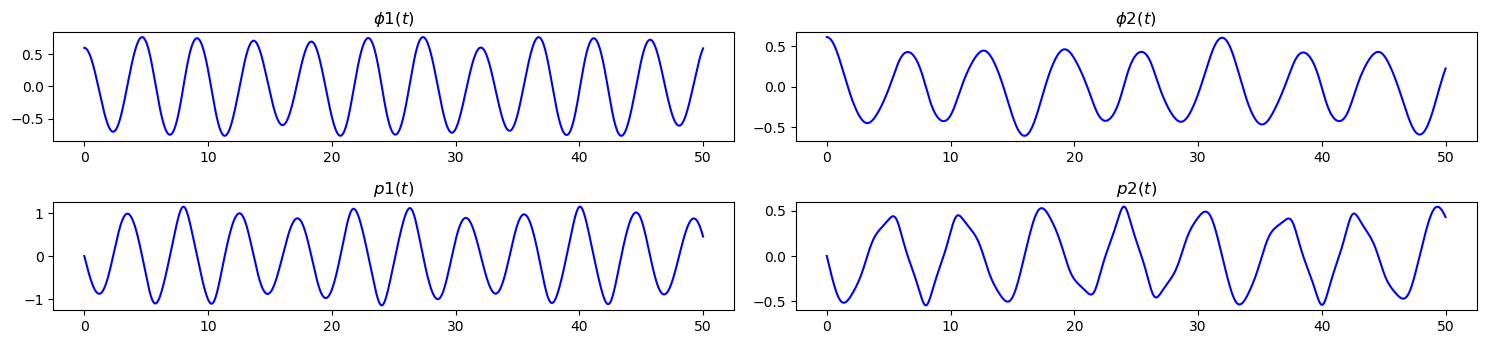

In [8]:
# both plots: same initial conditions
phi1_0 = 0.6
phi2_0 = 0.61
p_phi1_0 = 0.
p_phi2_0 = 0.

phi1, phi2, p_phi1, p_phi2  = p1.solve_ode(t_pts, phi1_0, phi2_0, p_phi1_0, p_phi2_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
    
# first plot: phi1 plot 
ax_a = fig.add_subplot(3,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            color='blue',
            label=None, 
            title=r'$\phi1(t)$', 
            ax=ax_a)    
                              
# second plot: phi2 plot 
ax_b = fig.add_subplot(3,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            color='blue',
            label=None, 
            title=r'$\phi2(t)$', 
            ax=ax_b)    

# third plot: p1 plot
ax_c = fig.add_subplot(3,2,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi1[start : stop], 
            color='blue',
            label=None, 
            title=r'$p1(t)$', 
            ax=ax_c)    

# Fourth plot: p2 plot
ax_d = fig.add_subplot(3,2,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi2[start : stop], 
            color='blue',
            label=None, 
            title=r'$p2(t)$', 
            ax=ax_d)    

fig.tight_layout()
fig.savefig('Double_Pendulum_Hamiltonian.png', bbox_inches='tight')  

Now trying the power spectrum, plotting only positive frequencies and cutting off the lower peaks:

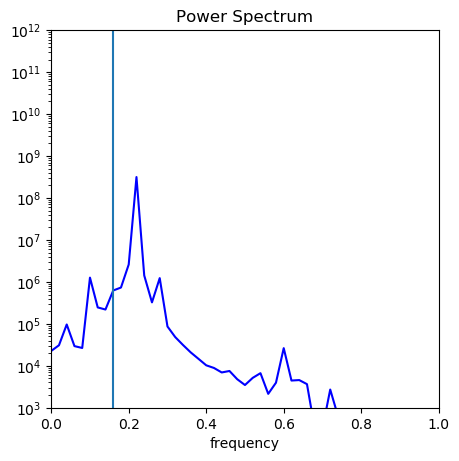

In [9]:
start, stop = start_stop_indices(t_pts, t_start, t_end)    
signal = phi1[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 1.)
ax_ps.set_ylim(1.e3, 1.e12)
ax_ps.set_xlabel('frequency')
ax_ps.set_title('Power Spectrum')
ax_ps.axvline(1./(2.*np.pi))

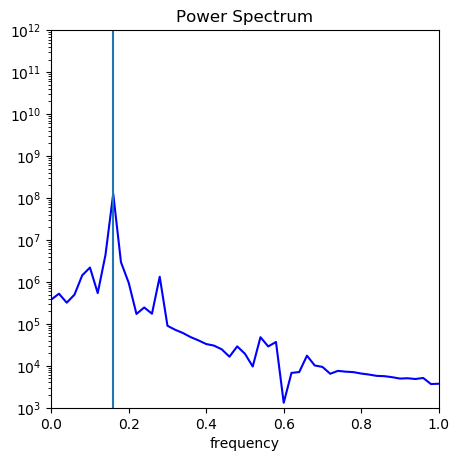

In [10]:
start, stop = start_stop_indices(t_pts, t_start, t_end)    
signal = phi2[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 1.)
ax_ps.set_ylim(1.e3, 1.e12)
ax_ps.set_xlabel('frequency')
ax_ps.set_title('Power Spectrum')
ax_ps.axvline(1./(2.*np.pi))

(<matplotlib.axes._subplots.AxesSubplot at 0x21d174f2c50>,
 <matplotlib.lines.Line2D at 0x21d1752ae10>)

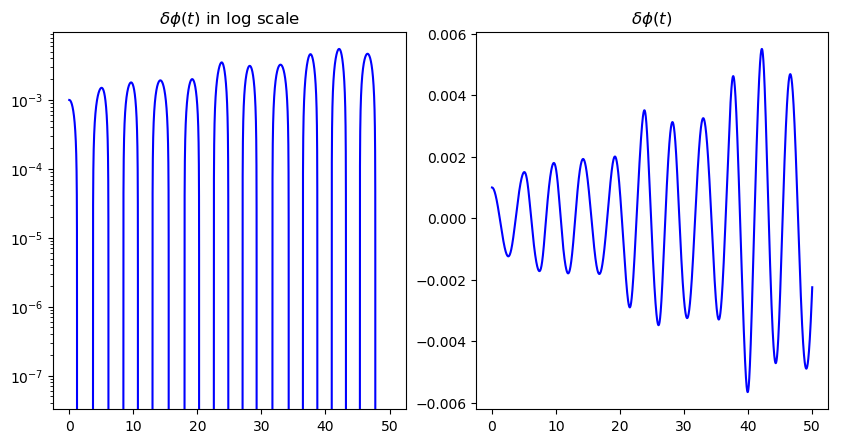

In [30]:
# Here we plot the delta_phi in log scale
phi1_0_C = 0.601
phi1_C, phi2, p_phi1, p_phi2  = p1.solve_ode(t_pts, phi1_0_C, phi2_0, p_phi1_0, p_phi2_0)
delta_phi=phi1_C-phi1

fig = plt.figure(figsize=(10,5))
    
# The plot is delta_phi vs. time in logscale
ax_a = fig.add_subplot(1,2,1)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], delta_phi[start : stop], 
            color='blue',
            label=None, 
            title=r'$\delta\phi(t)$ in log scale', 
            ax=ax_a)    
plt.semilogy()  

ax_a = fig.add_subplot(1,2,2)                  
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], delta_phi[start : stop], 
            color='blue',
            label=None, 
            title=r'$\delta\phi(t)$', 
            ax=ax_a) 

# Chaotic motion

From the above power spectrum plots, it's clear that both of them are having numbers of frequencies that none of them are not repeated themselves. If the time line extends, they will also not repeat which can be foreseen even though they have a constant external force(The gravitational force). That point is also shown in the $\phi(t)$ plots above, $\phi_1$ and $\phi_2$ have no periods for themselves to repeat.

Besides, they are sensitive to the initial conditions, I changed initial conditions with $1$% of their values and the results seem to be obviously different from before. $\delta\phi$ shows the results after I changed $\phi_1$ at time $t=0$ from $0.6$ to $0.601$. The results cause quite a lot difference which is more clear in the log scale plot. Thus, the motion is clearly sensitive to the initial conditions, the motion is chaotic.

In [12]:
#Get the widget
def update_plot(phi1_0, phi2_0, p_phi1_0, p_phi2_0):
    
    phi1, phi2, p_phi1, p_phi2  = p1.solve_ode(t_pts, phi1_0, phi2_0, p_phi1_0, p_phi2_0)
    
    fig = plt.figure(figsize=(15,5))
    ax_a = fig.add_subplot(1,4,1)                  
    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            color='blue',
            label=None, 
            title=r'$\phi1(t)$', 
            ax=ax_a)    
    
    ax_b = fig.add_subplot(1,4,2)                  
    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
                color='blue',
                label=None, 
                title=r'$\phi2(t)$', 
                ax=ax_b)    

    ax_c = fig.add_subplot(1,4,3)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(t_pts[start : stop], p_phi1[start : stop], 
                color='blue',
                label=None, 
                title=r'$p1(t)$', 
                ax=ax_c)    

    ax_d = fig.add_subplot(1,4,4)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(t_pts[start : stop], p_phi2[start : stop], 
                color='blue',
                label=None, 
                title=r'$p2(t)$', 
                ax=ax_d)    
    
phi1_0_w = FloatSlider(value=1.0, min=0.1, max=10., step=0.1,
                      description=r'$\phi1_0_w$ :')
phi2_0_w = FloatSlider(value=1.0, min=0.1, max=10., step=0.1,
                      description=r'$\phi2_0_w$ :')
p_phi1_0_w = FloatSlider(value=1.0, min=0., max=10., step=0.1,
                      description=r'$\p_phi1_0_w$ :')
p_phi2_0_w = FloatSlider(value=1.0, min=0., max=10., step=0.1,
                      description=r'$\p_phi2_0_w$ :')
plot_out = widgets.interactive_output(update_plot,
                                      dict(
                                      phi1_0=phi1_0_w,
                                      phi2_0=phi2_0_w,
                                      p_phi1_0=p_phi1_0_w,
                                      p_phi2_0=p_phi2_0_w,
                                      )
                                     )

hbox_1 = HBox([phi1_0_w, phi2_0_w])
hbox_2 = HBox([p_phi1_0_w, p_phi2_0_w])
UI_box = VBox([hbox_1, hbox_2, plot_out])
display(UI_box)   